# Ciclo08: Neural Network MLP

# 00 - Imports

In [10]:
import pandas as pd
import random
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import preprocessing as pp
from sklearn import metrics as m
from scikitplot import metrics as mt
from sklearn.preprocessing import RobustScaler
from category_encoders import TargetEncoder

from keras import models as ml
from keras import layers as l
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint

import warnings
import pickle

warnings.filterwarnings('ignore')

from IPython.core.display import display, HTML
display(HTML(""))

## Functions

In [11]:
def drescriptive_statistical (df):

    num_atributes = df.copy()
    #Central Tendency - mean - median
    ct1 = pd.DataFrame(num_atributes.apply(np.mean)).T
    ct2 = pd.DataFrame(num_atributes.apply(np.median)).T

    #Dispersion - STD, min, max, range, sken, Kurtosis
    d1 = pd.DataFrame(num_atributes.apply(np.std)).T
    d2 = pd.DataFrame(num_atributes.apply(min)).T
    d3 = pd.DataFrame(num_atributes.apply(max)).T
    d4 = pd.DataFrame(num_atributes.apply(lambda x: x.max() - x.min() )).T
    d5 = pd.DataFrame(num_atributes.apply(lambda x: x.skew() )).T
    d6 = pd.DataFrame(num_atributes.apply(lambda x: x.kurtosis() )).T

    #Concatenate

    m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
    m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
    return m


def jupyter_settings():
    %matplotlib inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    #display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()
    jupyter_settings()


#Function Calculates cramer V
def cramer_v(x, y):
    cm = pd.crosstab(x, y).values
    n = cm.sum()
    r, k = cm.shape
    
    chi2 = stats.chi2_contingency( cm )[0]
    chi2corr = max(0, chi2 - ( k - 1 ) * ( r - 1) / (n - 1))
    kcorr = k - (k - 1) **2/(n - 1) 
    rcorr = r - (r - 1) **2/(n - 1)
    
    return np.sqrt( (chi2corr / n) / (min(kcorr -1, rcorr -1) ) )

## Paths

In [12]:
path_data = '/home/wellington/Documentos/Projetos/Projetos_ds_pa/airbnb_predict_first_booking/airbnb_predict_first_booking/data/'
path_model = '/home/wellington/Documentos/Projetos/Projetos_ds_pa/airbnb_predict_first_booking/airbnb_predict_first_booking/models/'
path_transformation = '/home/wellington/Documentos/Projetos/Projetos_ds_pa/airbnb_predict_first_booking/airbnb_predict_first_booking/transformation_data/'

## Loading Data

|Feature Name| Information|
|----------------|:---------------:|
|id:                         |ID do Usuario
|date_account_created:       |Data da Criação da Conta
|timestamp_first_active:     |Data do primeira acesso, note que pode ser anterior à data de criação da conta ou à data da primeira reserva porque um utilizador pode pesquisar antes de se inscrever
|date_first_booking:         |data da primeira reserva
|gender                      |Sexo
|age                         |Idade 
|signup_method               |Metodo de inscrição
|signup_flow:                |fluxo de inscrição: a página de onde um utilizador veio para se inscrever
|language:                   |Preferencia linguistica internacional
|affiliate_channel:          |canal afiliado: que tipo de marketing pago
|affiliate_provider:         |fornecedor afiliado: onde o marketing é, por exemplo, google, craigslist, outro
|first_affiliate_tracked:    |primeira afiliação rastreada: qual foi o primeiro marketing com que o utilizador interagiu antes da inscrição
|signup_app                  |Aplicativo de inscrição
|first_device_type           |Primeiro tipo de dispositivo
|first_browser               |Primeiro nagevagor
|country_destination:        |Destino do pai:Variavel alvo que deve prever


In [13]:
X_train = pd.read_csv(path_data+'X_train_cols_select.csv')
X_val = pd.read_csv(path_data+'X_val_cols_select.csv')
y_train = pd.read_csv(path_data+'y_train.csv')
y_val = pd.read_csv(path_data+'y_val.csv')

In [14]:
ohe = pp.OneHotEncoder()

y_train_nn = ohe.fit_transform( y_train.values.reshape( -1, 1)).toarray()

# 9.0 Machine Learning Model

### Neural Network MLP

In [11]:
##Model Definition
model = ml.Sequential()
#
model.add( l.Dense(128, input_dim=X_train.shape[1], activation= 'relu'))
model.add( l.Dense( 12, activation = 'softmax'))
#
#model Compile
opt = SGD( lr= 0.01, momentum= 0.8)
model.compile( loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Train model
model.fit( X_train, y_train_nn, epochs=100)

2022-12-18 11:30:59.399568: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-18 11:30:59.399761: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-18 11:30:59.399816: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-12-18 11:30:59.399864: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-12-18 11:30:59.399910: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

Epoch 1/100
31513/31513 [==============================] - 18s 548us/step - loss: 2.0485 - accuracy: 0.2664
Epoch 2/100
31513/31513 [==============================] - 17s 550us/step - loss: 1.9408 - accuracy: 0.3110
Epoch 3/100
31513/31513 [==============================] - 17s 548us/step - loss: 1.9073 - accuracy: 0.3228
Epoch 4/100
31513/31513 [==============================] - 17s 552us/step - loss: 1.8890 - accuracy: 0.3288
Epoch 5/100
31513/31513 [==============================] - 17s 550us/step - loss: 1.8770 - accuracy: 0.3330
Epoch 6/100
31513/31513 [==============================] - 17s 550us/step - loss: 1.8678 - accuracy: 0.3357
Epoch 7/100
31513/31513 [==============================] - 17s 549us/step - loss: 1.8617 - accuracy: 0.3380
Epoch 8/100
31513/31513 [==============================] - 17s 551us/step - loss: 1.8563 - accuracy: 0.3396
Epoch 9/100
31513/31513 [==============================] - 17s 549us/step - loss: 1.8531 - accuracy: 0.3408
Epoch 10/100
31513/31513 [==

In [12]:
#Salvando o treinamento em um arquico compactado
#pickle.dump(model, open(path_model+'ciclo008_Neural_Network.pkl', 'wb'))

INFO:tensorflow:Assets written to: ram://6b1008c9-e7ec-4980-8ac0-fd234f8d665f/assets


In [7]:
model = pickle.load(open(path_model+'ciclo007_feature_select_boruta_model_NLP.pkl', 'rb'))

#Prediction
pred_nn = model.predict(X_val)

#Invert prediction
yhat_nn = ohe.inverse_transform(pred_nn)

#Prediction prepare
y_val_nn = y_val.to_numpy()
yhat_nn = yhat_nn.reshape(1, -1)[0]

2022-12-18 19:21:22.689610: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2022-12-18 19:21:22.689638: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: wellington-IPMH510G
2022-12-18 19:21:22.689642: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: wellington-IPMH510G
2022-12-18 19:21:22.689757: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 510.85.2
2022-12-18 19:21:22.689772: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 510.85.2
2022-12-18 19:21:22.689775: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 510.85.2
2022-12-18 19:21:22.690118: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in p

7879/7879 [==============================] - 3s 418us/step


Accuracy: 0.36634087519436426
Balanced Accuracy: 0.36500792894874645
Kappa Score: 0.30832255569348554


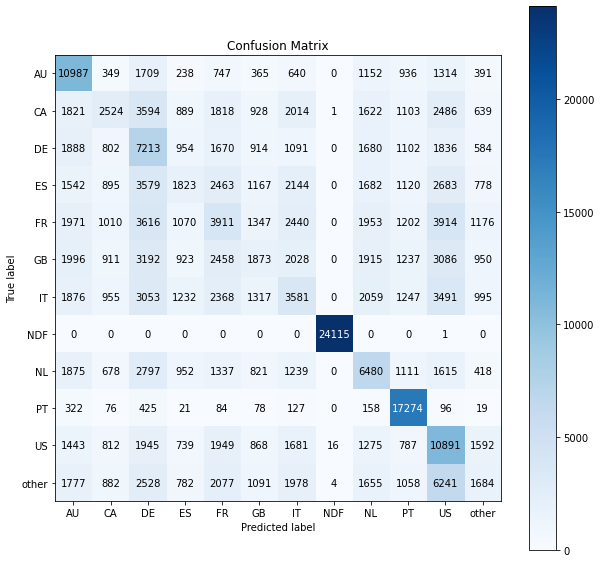

In [8]:
#Accuracy
acc_nn = m.accuracy_score(y_val_nn, yhat_nn)
print('Accuracy: {}'.format(acc_nn))

#Confusion Matrix
mt.plot_confusion_matrix( y_val_nn, yhat_nn, normalize= False, figsize=(10,10))

#Balanced Accuracy
balanced_accuracy = m.balanced_accuracy_score(y_val_nn, yhat_nn )
print('Balanced Accuracy: {}'.format(balanced_accuracy))

#Kappa Metrics
kappa_score = m.cohen_kappa_score(y_val_nn, yhat_nn)
print('Kappa Score: {}'.format(kappa_score))

#Objetivo é aumentar o Balanced Accuracy para uns 85% (Acuracia para apresentar ao time de negocio
#Kappa Score uns 75% (Nivel de concordancia entre as classes).

#print(m.classification_report(y_val_nn, yhat_nn))